# Lab | Comparing regression models
For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

## Instructions
1. In this final lab, we will model our data. Import sklearn train_test_split and separate the data.
2. Try a simple linear regression with all the data to see whether we are getting good results.
3. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.
4. Use the function to check LinearRegressor and KNeighborsRegressor.
5. You can check also the MLPRegressor for this task!
6. Check and discuss the results.

### Import the necessary libraries.

In [76]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split

### Load dataframes which have already been cleaned and saved to csv.

In [77]:
X = pd.read_csv('X_full.csv')
y= pd.read_csv('target.csv')

### Check dataframes.

In [78]:
X.head()

,Unnamed: 0,income,monthly_premium_auto,total_claim_amount,months_since_last_claim,months_since_policy_inception,day_week,month,number_of_open_complaints,number_of_policies,...,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,0,56274.0000,69,384.81,32,5,3,2,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,59108.7738,94,1131.46,13,42,0,1,0,8,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,48767.0000,108,566.47,18,38,5,2,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,39069.2262,106,529.88,18,65,3,1,0,7,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,43836.0000,73,138.13,12,44,3,2,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
X.drop('Unnamed: 0', axis=1, inplace=True) #new index has been created when file was saved to csv. drop it.

In [80]:
X.columns

Index(['income', 'monthly_premium_auto', 'total_claim_amount',
       'months_since_last_claim', 'months_since_policy_inception', 'day_week',
       'month', 'number_of_open_complaints', 'number_of_policies', 'coverage',
       'employmentstatus', 'location_code', 'vehicle_size', 'education',
       'state_California', 'state_Nevada', 'state_Oregon', 'state_Washington',
       'marital_status_Married', 'marital_status_Single',
       'policy_type_Personal Auto', 'policy_type_Special Auto',
       'renew_offer_type_Offer2', 'renew_offer_type_Offer3',
       'renew_offer_type_Offer4', 'sales_channel_Branch',
       'sales_channel_Call Center', 'sales_channel_Web',
       'vehicle_class_Luxury Car', 'vehicle_class_Luxury SUV',
       'vehicle_class_SUV', 'vehicle_class_Sports Car',
       'vehicle_class_Two-Door Car'],
      dtype='object')

In [81]:
X.shape

(9117, 33)

In [82]:
X.info() # all columns are numericals so we can proceed with modeling

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9117 entries, 0 to 9116
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   income                         9117 non-null   float64
 1   monthly_premium_auto           9117 non-null   int64  
 2   total_claim_amount             9117 non-null   float64
 3   months_since_last_claim        9117 non-null   int64  
 4   months_since_policy_inception  9117 non-null   int64  
 5   day_week                       9117 non-null   int64  
 6   month                          9117 non-null   int64  
 7   number_of_open_complaints      9117 non-null   int64  
 8   number_of_policies             9117 non-null   int64  
 9   coverage                       9117 non-null   int64  
 10  employmentstatus               9117 non-null   int64  
 11  location_code                  9117 non-null   int64  
 12  vehicle_size                   9117 non-null   i

In [83]:
y.head() # same indexing that occured. Unnamed column.
y.drop('Unnamed: 0', axis=1, inplace=True)

In [93]:
y = y.iloc[:,0]

In [94]:
y

0        2763.52
1        6979.54
2       12887.43
3        7645.86
4        2813.69
          ...   
9112     5032.17
9113     4100.40
9114    23405.99
9115     3096.51
9116     7524.44
Name: customer_lifetime_value, Length: 9117, dtype: float64

### Train-Test Split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

### Models Function

In [96]:
def fit_regressor(X, y, model_type):
    '''choose model to apply
    linear : linear regression
    knn : knn regression
    mlp : mlp regressor'''
    
    #libraries
    from sklearn.linear_model import LinearRegression
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.neural_network import MLPRegressor
    from sklearn.model_selection import train_test_split
    
    #train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
    
    if model_type == "linear":
        model = LinearRegression()
    elif model_type == "knn":
        k = int(input("k="))
        w = str(input("uniform or distance?"))
        model = KNeighborsRegressor(n_neighbors=k, weights=w)
    elif model_type == "mlp":
        model = MLPRegressor(random_state=100)
    else:
        return None
    
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    return prediction

### Metrics Function

In [97]:
def metrics(pred):
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
    
    MAE = mean_absolute_error(y_test,pred)
    MSE = mean_squared_error(y_test,pred)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test,pred)
    r2_adj = 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    
    index = ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'R Squared (R2)', 'Adjusted R2']
    metrics = pd.Series([MAE,MSE,RMSE,R2,r2_adj], index=index)
    return metrics.round(2)

### Linear Regression

In [98]:
linear_pred = fit_regressor(X,y,'linear')
linear_pred

array([ 5634.53761621, 10106.04825585,  9385.79307103, ...,
        7355.70861291, 16167.07447255, 13392.61908732])

Text(0.5, 1.0, 'Linear Regression Plot')

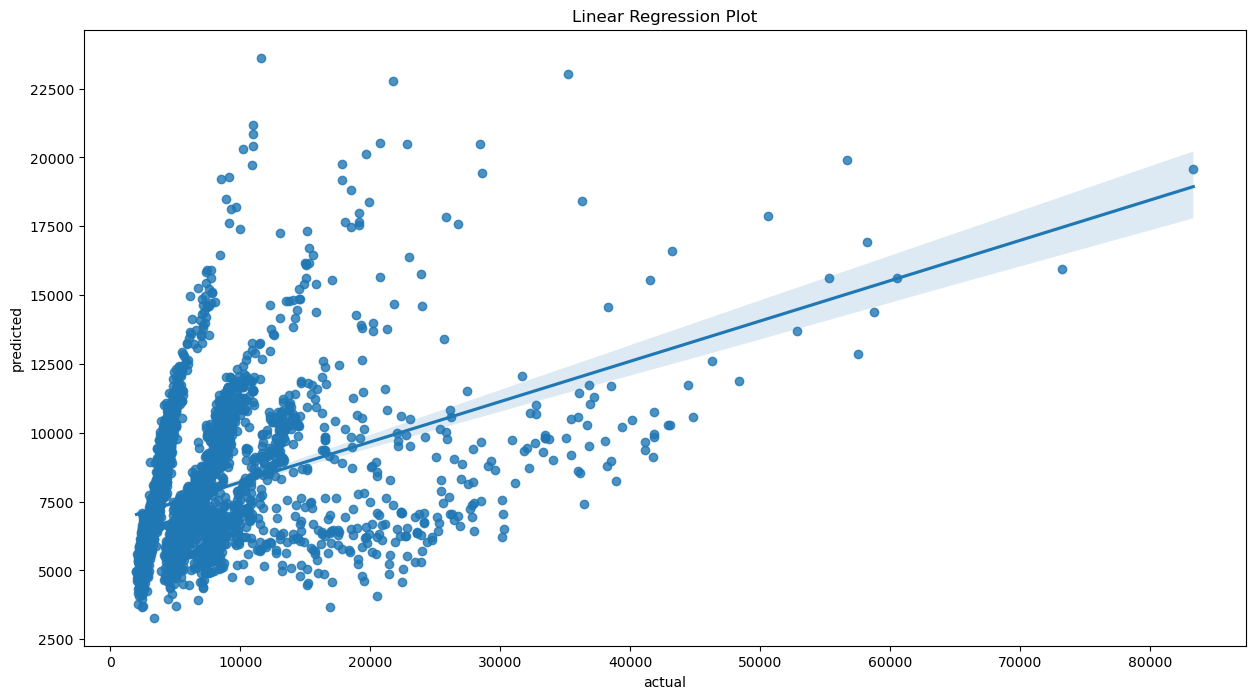

In [99]:
fig = plt.figure(figsize=(15,8))
sns.regplot(x= y_test, y= linear_pred)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('Linear Regression Plot')

In [100]:
metrics(linear_pred)

Mean Absolute Error (MAE)             4030.23
Mean Squared Error (MSE)          45146533.49
Root Mean Squared Error (RMSE)        6719.12
R Squared (R2)                           0.16
Adjusted R2                              0.15
dtype: float64

Looking at the metrics, this model is not very good 😅 but in comparison to knn and mlp regressor below, it provides the "best" metrics.

### KNN Regressor

First, using k=10, we check the difference between uniform and distance weights.

In [101]:
knn_pred0 = fit_regressor(X, y, 'knn') #chose k=10, weight=uniform
knn_pred0

array([10612.344,  7099.546, 14152.256, ...,  9775.339, 18602.954,
       12283.834])

In [102]:
knn_pred1 = fit_regressor(X, y, 'knn') #chose k=10, weight=distance
knn_pred1

array([ 9922.68499879,  8296.3313106 , 13835.3196303 , ...,
        8724.87849945, 17004.58790696, 11555.18606304])

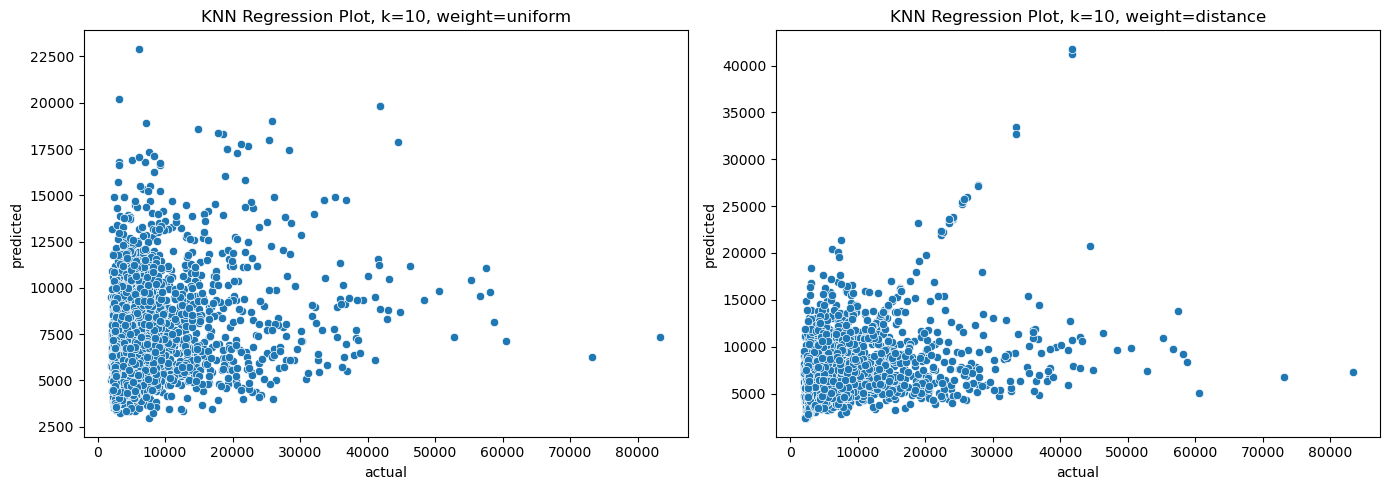

In [104]:
fig = plt.figure(figsize = (14,5))

plt.subplot(121)
sns.scatterplot(x= y_test, y = knn_pred0)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('KNN Regression Plot, k=10, weight=uniform')

plt.subplot(122)
sns.scatterplot(x= y_test, y= knn_pred1)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('KNN Regression Plot, k=10, weight=distance')

plt.tight_layout()
plt.show()

In [123]:
metrics(knn_pred0)

Mean Absolute Error (MAE)             4381.16
Mean Squared Error (MSE)          51990034.64
Root Mean Squared Error (RMSE)        7210.41
R Squared (R2)                           0.03
Adjusted R2                              0.02
dtype: float64

In [124]:
metrics(knn_pred1)

Mean Absolute Error (MAE)             4039.50
Mean Squared Error (MSE)          49731523.90
Root Mean Squared Error (RMSE)        7052.06
R Squared (R2)                           0.07
Adjusted R2                              0.06
dtype: float64

Looking at the metrics, we can see that weight=distance provides slightly better results.

In [127]:
# Looking for the optimal K
from sklearn.neighbors import KNeighborsRegressor
scores = [] # We will store here the R2 values for each of our K-NN models with different K-values.
for i in range(10, 200, 10): # k = 1 to 100, using steps of 10
    model = KNeighborsRegressor(n_neighbors=i, weights='distance')
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

In [139]:
def optimal_k(start, end, increment):
    from sklearn.neighbors import KNeighborsRegressor
    scores = [] # We will store here the R2 values for each of our K-NN models with different K-values.
    for i in range(start, end, increment): 
        model = KNeighborsRegressor(n_neighbors=i, weights='distance')
        model.fit(X_train, y_train)
        scores.append(model.score(X_test, y_test))
    plt.figure(figsize=(10,6))
    plt.title('R2 vs. K Value')
    plt.xlabel('K')
    plt.ylabel('R2')
    return plt.plot(range(start, end, increment), scores, color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)

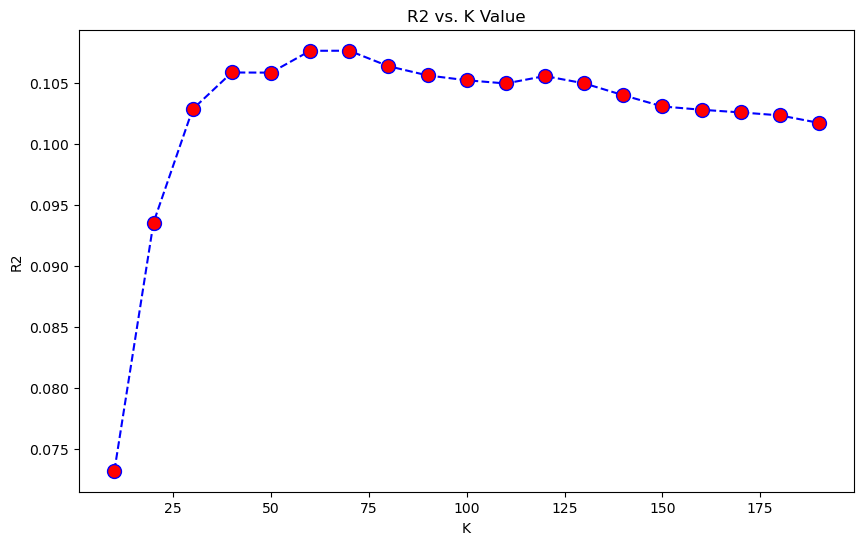

In [140]:
optimal_k(10,200,10)

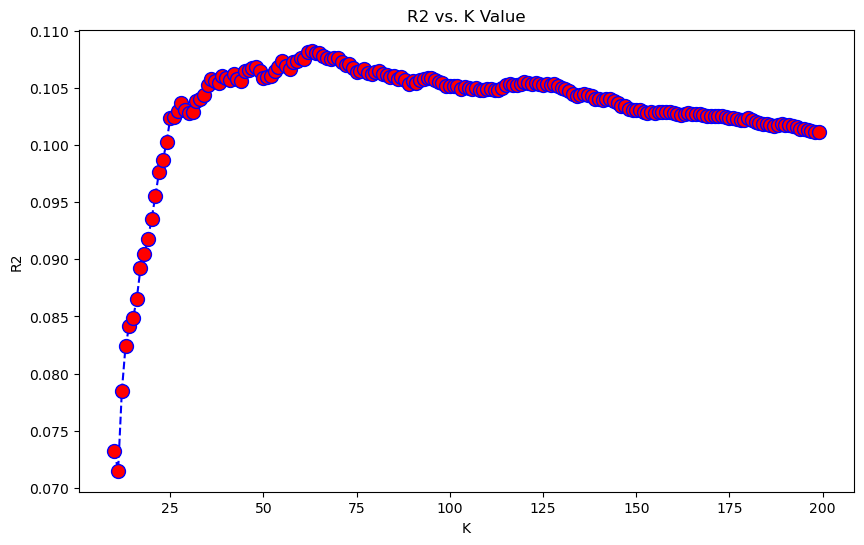

In [141]:
optimal_k(10,200,1)

Trying to see how the metrics change using k that corresponds to the highest R-squared based on the optimal_k function above.

In [106]:
knn_pred2 = fit_regressor(X, y, 'knn') #k=40, weight=distance
knn_pred2

array([ 9362.2487162 ,  8775.67508695,  8277.95439091, ...,
        8352.88984878, 12700.962231  ,  9648.22588601])

In [107]:
knn_pred3 = fit_regressor(X, y, 'knn') #k=60, weight=distance
knn_pred3

array([ 9375.68820541,  8512.73149332,  8085.97258534, ...,
        7903.7199477 , 11681.16986683,  9089.53124026])

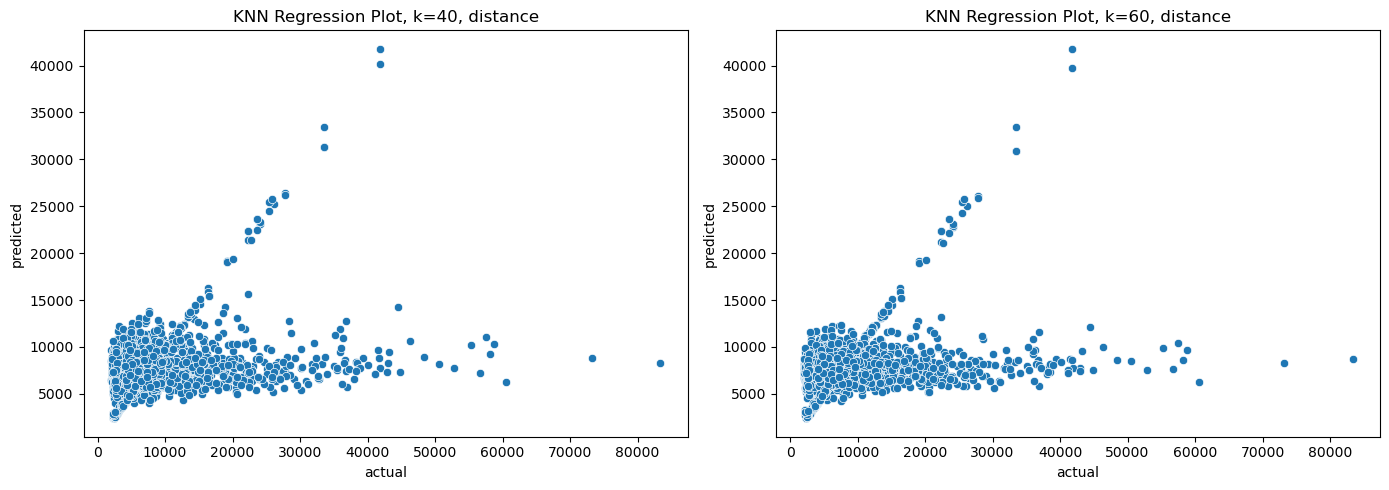

In [148]:
fig = plt.figure(figsize = (14,5))

plt.subplot(121)
sns.scatterplot(x= y_test, y= knn_pred2)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('KNN Regression Plot, k=40, distance')

plt.subplot(122)
sns.scatterplot(x= y_test, y= knn_pred3)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('KNN Regression Plot, k=60, distance')

plt.tight_layout()
plt.show()

In [143]:
metrics(knn_pred2)

Mean Absolute Error (MAE)             3911.94
Mean Squared Error (MSE)          47980524.91
Root Mean Squared Error (RMSE)        6926.80
R Squared (R2)                           0.11
Adjusted R2                              0.09
dtype: float64

In [144]:
metrics(knn_pred3)

Mean Absolute Error (MAE)             3898.27
Mean Squared Error (MSE)          47885150.38
Root Mean Squared Error (RMSE)        6919.91
R Squared (R2)                           0.11
Adjusted R2                              0.10
dtype: float64

Not much difference in the results between k=40 and k=60.

In [154]:
# using k = sqrt of n observations 
np.sqrt(X.shape[0]).round()

95.0

In [155]:
knn_sqrt = fit_regressor(X,y,'knn')
knn_sqrt

array([ 8646.62947958,  8549.72340237,  7401.87289825, ...,
        7515.77228765, 10245.69826748,  9085.39010135])

Text(0.5, 1.0, 'KNN Regression Plot, k=95, weight=distance')

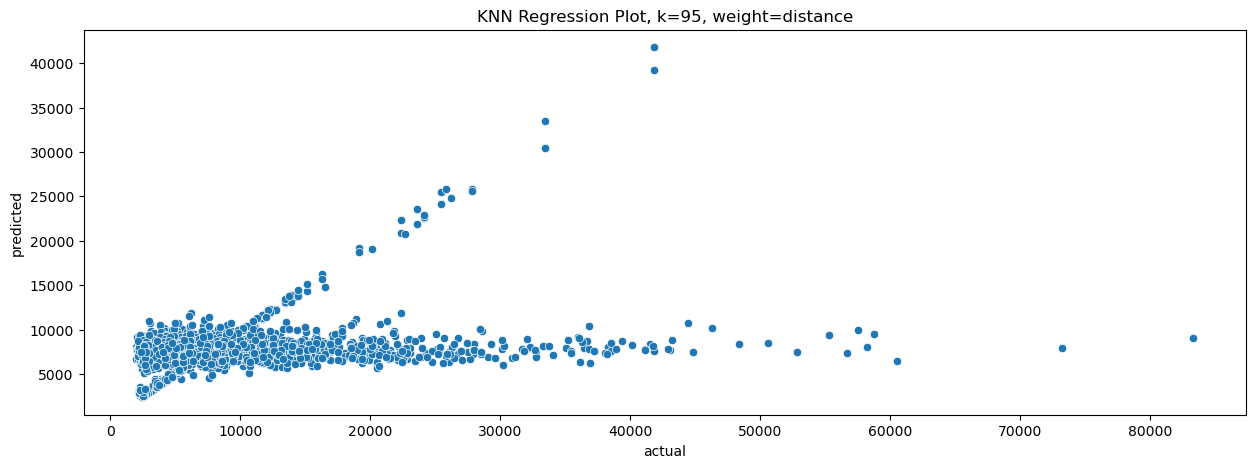

In [159]:
plt.figure(figsize=(15,5))
sns.scatterplot(x= y_test, y= knn_sqrt)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('KNN Regression Plot, k=95, weight=distance')

In [160]:
metrics(knn_sqrt) #results same as k=40

Mean Absolute Error (MAE)             3910.00
Mean Squared Error (MSE)          47977711.31
Root Mean Squared Error (RMSE)        6926.59
R Squared (R2)                           0.11
Adjusted R2                              0.09
dtype: float64

Between linear regression and KNN regression, the former provides better R2 and Adjusted R2.

### MLP Regressor

In [149]:
mlp_pred = fit_regressor(X, y, 'mlp')
mlp_pred

/Users/rachelleflores/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([ 5265.78940994,  8447.01237627,  8456.74515424, ...,
        7784.34663639, 14463.27353333, 12904.86017201])

Text(0.5, 1.0, 'MLP Regressor Plot')

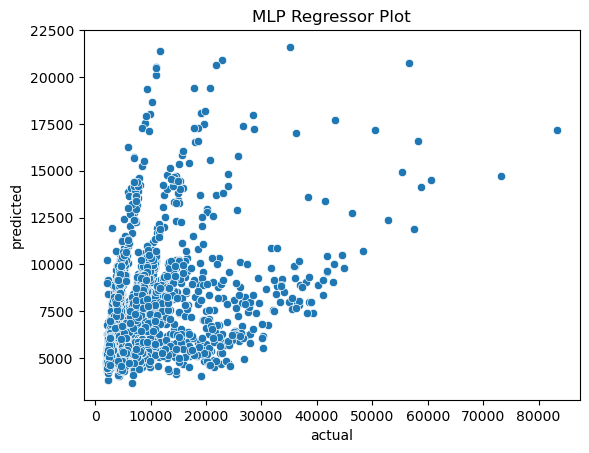

In [150]:
sns.scatterplot(x= y_test, y= mlp_pred)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('MLP Regressor Plot')

In [151]:
metrics(mlp_pred)

Mean Absolute Error (MAE)             3836.55
Mean Squared Error (MSE)          46430960.74
Root Mean Squared Error (RMSE)        6814.03
R Squared (R2)                           0.13
Adjusted R2                              0.12
dtype: float64

And adding the MLP regressor to the mix, I have no idea which model is better. I saw that MLP is great in dealing with large numbers of features and can provide accurate predictions since it is capable of learning pattern and non-linear relationships but I have no idea how it works for now. 😳 The more we learn, the less I know 😩≤≤